In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

# 1. Pendulum


다음처럼 주어지는 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 $\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

In [17]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta, w = np.array([]), np.array([])
theta0, w0 = 1, 0

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta = np.append(theta, theta0)
    w = np.append(w, w0) 

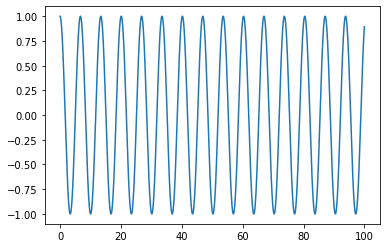

In [18]:
plt.plot(t, theta)

# 2. Pendulum (small oscillations)

1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면
$\sin\theta \approx \theta$ 근사를 적용할 수 있다.

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

In [19]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta, w = np.array([]), np.array([])
theta0, w0 = 1, 0

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta = np.append(theta, theta0)
    w = np.append(w, w0) 

In [20]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta1, w = np.array([]), np.array([])
theta0, w0 = 1, 0.1

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta1 = np.append(theta1, theta0)
    w = np.append(w, w0) 

In [21]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta2, w = np.array([]), np.array([])
theta0, w0 = 0.1, 1

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta2 = np.append(theta2, theta0)
    w = np.append(w, w0) 

In [22]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta3, w = np.array([]), np.array([])
theta0, w0 = 0.1, 0.1

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta3 = np.append(theta3, theta0)
    w = np.append(w, w0) 

In [23]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta4, w = np.array([]), np.array([])
theta0, w0 = 1, 1

for i in t:
    theta0 = theta0 + w0*dt
    w0 = w0 -(g/L)*np.sin(theta0)*dt
    theta4 = np.append(theta4, theta0)
    w = np.append(w, w0) 

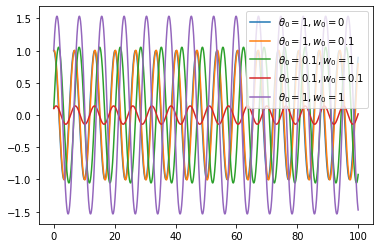

In [24]:
plt.plot(t, theta, label = '$ \\theta_0 = 1, w_0 = 0 $')
plt.plot(t, theta1, label = '$ \\theta_0 = 1, w_0 = 0.1 $')
plt.plot(t, theta2, label = '$ \\theta_0 = 0.1, w_0 = 1 $')
plt.plot(t, theta3, label = '$ \\theta_0 = 0.1, w_0 = 0.1 $')
plt.plot(t, theta4, label = '$ \\theta_0 = 1, w_0 = 1 $')
plt.legend()
plt.show()

# 3. Damped Pendulum

다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다.

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

In [10]:
g, L = 9.8, 9.8
dt = 0.01
t = np.arange(0,100,dt)
theta, w = np.array([]), np.array([])
theta0, w0 = 1, 0
beta = 0.1

for i in t:
    theta0 = theta0 + dt*w0
    w0 = w0 - (beta*w0*dt) - (g/L*np.sin(theta0)*dt)
    theta = np.append(theta, theta0)
    w = np.append(w, w0)

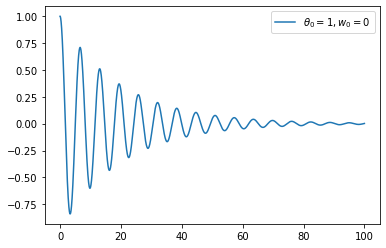

In [11]:
plt.plot(t, theta, label = '$ \\theta_0 = 1, w_0 = 0 $')
plt.legend()
plt.show()

# 4. Forced Pendulum


다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다.

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라.

In [12]:
dt = 0.01
A, v = 1, 2
g, L = 9.8, 9.8 
beta = 0.1
t = np.arange(0,100,dt)
theta, w = np.array([]), np.array([])
theta0, w0 = 1, 0

for i in t:
    theta0 = theta0 + dt*w0
    w0 = w0 - (dt*w0*beta) - (dt*g/L*np.sin(theta0)) + (A*np.cos(v*i))
    theta = np.append(theta, theta0)
    w = np.append(w, w0)

In [13]:
dt = 0.01
A, v = 1, 1
g, L = 9.8, 9.8 
beta = 0.1
t = np.arange(0,100,dt)
theta1, w = np.array([]), np.array([])
theta0, w0 = 1, 0

for i in t:
    theta0 = theta0 + dt*w0
    w0 = w0 - (dt*w0*beta) - (dt*g/L*np.sin(theta0)) + (A*np.cos(v*i))
    theta1 = np.append(theta1, theta0)
    w = np.append(w, w0)

In [14]:
dt = 0.01
A, v = 1, 0.5
g, L = 9.8, 9.8 
beta = 0.1
t = np.arange(0,100,dt)
theta2, w = np.array([]), np.array([])
theta0, w0 = 1, 0

for i in t:
    theta0 = theta0 + dt*w0
    w0 = w0 - (dt*w0*beta) - (dt*g/L*np.sin(theta0)) + (A*np.cos(v*i))
    theta2 = np.append(theta2, theta0)
    w = np.append(w, w0)

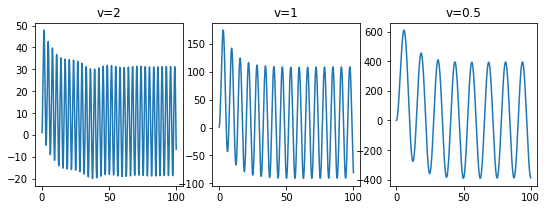

In [15]:
plt.figure(figsize=(9,3))

plt.subplot(131)
plt.plot(t, theta)
plt.title('v=2')

plt.subplot(132)
plt.plot(t, theta1)
plt.title('v=1')

plt.subplot(133)
plt.plot(t, theta2)
plt.title('v=0.5')

plt.show()

small oscillation (-2) - np.sin(theta)가 아니라 theta를 서서 1번 결과와 비교해야 함.

forced pedulum (-2) - Anp.cos(vi)*dt 가 되어야 함.